In [113]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pandas
from IPython.display import display

In [114]:
'''
adult_df = pandas.read_csv("./data/adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/bank.csv", index_col=0)
german_df = pandas.read_csv("./data/german.csv", index_col=0)

'''

adult_df = pandas.read_csv("./data/All_Data -adult.csv", index_col=0)
compas_df = pandas.read_csv("./data/All_Data -compas.csv", index_col=0)
bank_df = pandas.read_csv("./data/All_Data -bank.csv", index_col=0)
german_df = pandas.read_csv("./data/All_Data -german.csv", index_col=0)


for df in [adult_df, compas_df, bank_df, german_df]:
    df["False Positive Rate Diff"] = df["False Positive Rate - Unprivileged"] - df["False Positive Rate - Privileged"]
    df["False Negative Rate Diff"] = df["False Negative Rate - Unprivileged"] - df["False Negative Rate - Privileged"]
    df["False Omission Rate Diff"] = df["False Omission Rate - Unprivileged"] - df["False Omission Rate - Privileged"]
    df["False Discovery Rate Diff"] = df["False Discovery Rate - Unprivileged"] - df["False Discovery Rate - Privileged"]
    df["Statistical Parity Diff"] = df["Privileged base Rate"] - df["Unprivileged base Rate"] 
    df["Accuracy Diff"] = df["Accuracy - Privileged"] - df["Accuracy - Unprivileged"] 
    df["F1 Score Diff"] = df["F1 Score - Privileged"] - df["F1 Score - Unprivileged"] 
    for metric in df.columns:
        if "Num" in metric:
            df.drop(metric, axis=1, inplace=True)

In [115]:
def num_interventions(name):
    if "Logistic Regression" in name:
        return 0
    if name.count('+') == 0:
        return 1
    if name.count('+') == 1:
        return 2
    if name.count('+') == 2:
        return 3
    
no_int = []
one_int = []
two_int = []
three_int = []
for row in list(adult_df.index):
    if num_interventions(row) == 0:
        no_int.append(row)
    elif num_interventions(row) == 1:
        one_int.append(row)
    elif num_interventions(row) == 2:
        two_int.append(row)
    elif num_interventions(row) == 3:
        three_int.append(row)
        
print(no_int)
print(one_int)
print(two_int)
print(three_int)

['Logistic Regression - 3', 'Logistic Regression - 11', 'Logistic Regression - 17']
['OP - 3', 'OP - 11', 'OP - 17', 'DIR - 3', 'DIR - 11', 'DIR - 17', 'EOP - 3', 'EOP - 11', 'EOP - 17', 'CEOP - 3', 'CEOP - 11', 'CEOP - 17', 'ROC - 3', 'ROC - 11', 'ROC - 17', 'GFC - 3', 'GFC - 11', 'GFC - 17', 'PR - 3', 'PR - 11', 'PR - 17', 'EGR - 3', 'EGR - 11', 'EGR - 17', 'GSR - 3', 'GSR - 11', 'GSR - 17']
['OP + EOP - 3', 'OP + EOP - 11', 'OP + EOP - 17', 'OP + CEOP - 3', 'OP + CEOP - 11', 'OP + CEOP - 17', 'OP + ROC - 3', 'OP + ROC - 11', 'OP + ROC - 17', 'OP + GFC - 3', 'OP + GFC - 11', 'OP + GFC - 17', 'OP + PR - 3', 'OP + PR - 11', 'OP + PR - 17', 'OP + EGR - 3', 'OP + EGR - 11', 'OP + EGR - 17', 'OP + GSR - 3', 'OP + GSR - 11', 'OP + GSR - 17', 'DIR + EOP - 3', 'DIR + EOP - 11', 'DIR + EOP - 17', 'DIR + CEOP - 3', 'DIR + CEOP - 11', 'DIR + CEOP - 17', 'DIR + ROC - 3', 'DIR + ROC - 11', 'DIR + ROC - 17', 'DIR + GFC - 3', 'DIR + GFC - 11', 'DIR + GFC - 17', 'DIR + PR - 3', 'DIR + PR - 11', 'DIR

In [116]:
col_names = []
for c in adult_df.columns:
    if "Diff" in c:
        col_names.append(c)

col_names #= ['False Positive Rate Diff']

['False Positive Rate Diff',
 'False Negative Rate Diff',
 'False Omission Rate Diff',
 'False Discovery Rate Diff',
 'Statistical Parity Diff',
 'Accuracy Diff',
 'F1 Score Diff']

In [46]:
adult_df[col_names]

,False Positive Rate Diff,False Negative Rate Diff,False Omission Rate Diff,False Discovery Rate Diff,Statistical Parity Diff,Accuracy Diff,F1 Score Diff
OP - 3,-0.0387,0.1468,-0.1392,0.3015,0.1167,-0.1145,0.2041
OP - 11,-0.0351,0.1628,-0.1363,0.3375,0.1134,-0.1101,0.2294
OP - 17,-0.0399,0.1679,-0.1196,0.3013,0.1185,-0.0987,0.2213
OP + EOP - 3,-0.0006,-0.0077,-0.1755,0.3059,0.0420,-0.1369,0.0719
OP + EOP - 11,0.0063,0.0145,-0.1698,0.3526,0.0386,-0.1240,0.1143
...,...,...,...,...,...,...,...
GSR + CEOP - 11,0.1343,-0.4699,-0.2010,0.4328,-0.0986,-0.0453,-0.0002
GSR + CEOP - 17,-0.0728,0.5255,-0.0701,-0.2349,0.2136,-0.0802,0.6231
GSR + ROC - 3,0.0630,-0.1368,-0.0979,0.3297,0.0420,0.0378,0.2456
GSR + ROC - 11,0.0229,-0.4365,-0.2328,0.2328,-0.0482,-0.2068,-0.4321


In [47]:
priv = {0:[], 1:[], 2:[], 3:[]}
for dataset in [adult_df, german_df, compas_df, bank_df]:
    d_sub = dataset[col_names]
    d_sub = np.sum(abs(d_sub)<=0.01, axis=1)/len(col_names)
    for inter, val in d_sub.items():
        k = num_interventions(inter)
        priv[k].append(val)

y_mean = []
for k in priv:
    print(k, len(priv[k]), np.mean(priv[k]))
    y_mean.append(round(np.mean(priv[k])*100))

0 12 0.023809523809523808
1 105 0.09251700680272107
2 291 0.10260186548846342
3 252 0.12414965986394555


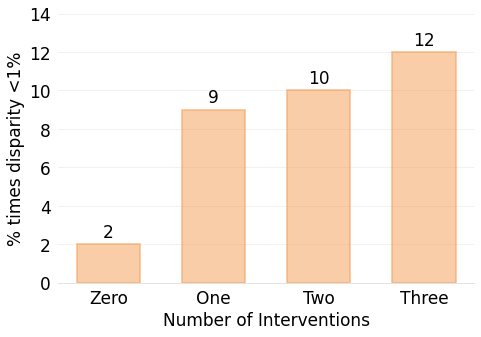

In [48]:
# percent of times privileged group performed worse than unprivileged group
x = ["Zero", "One", "Two", "Three"]
fig, ax = plt.subplots(figsize=(7, 5))
c = 'sandybrown'
rects1 = ax.bar(x, y_mean, color=c, edgecolor=c, alpha=0.55, width=0.6, linewidth=2)

plt.rcParams.update({'font.size': 17})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.bar_label(rects1, padding=3)
ax.set_ylim([0, 14])

ax.set_ylabel('% times disparity <1%')
#ax.set_ylabel('Group Fairness')
ax.set_xlabel('Number of Interventions')

fig.tight_layout()
#plt.show()
fig.savefig('./figures/group_fair_inter.png', dpi=600)

<h3>Individual Bias</h3>

In [49]:
ind_bias = {0:{"theil":[], "consis":[]}, 1:{"theil":[], "consis":[]}, 2:{"theil":[], "consis":[]}, 3:{"theil":[], "consis":[]}}
for dataset in [adult_df, german_df, compas_df, bank_df]:
    d = dataset[["Theil Index", "Consistency"]]
    for index, row in d.iterrows():
        k = num_interventions(index)
        #print(index, k, row["Theil Index"], row["Consistency"])
        ind_bias[k]["theil"].append(row["Theil Index"])
        ind_bias[k]["consis"].append(row["Consistency"])

theil_mean = [round(np.mean(ind_bias[k]["theil"])*100) for k in [0,1,2,3]]
consis_mean = [round(np.mean(ind_bias[k]["consis"])*100) for k in [0,1,2,3]]
theil_mean, consis_mean 

([14, 16, 19, 19], [89, 90, 91, 91])

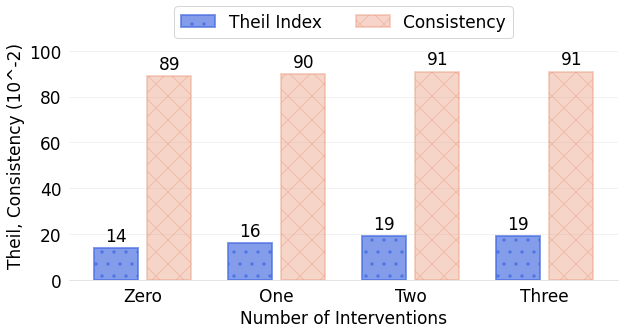

In [50]:
# percent of times privileged group performed worse than unprivileged group
x = np.arange(4)
x_lab = ["Zero", "One", "Two", "Three"]
fig, ax = plt.subplots(figsize=(9, 5))

width = 0.4 
c1, c2 = 'royalblue', 'darksalmon'
rects1 = ax.bar(x - width/2, theil_mean, label='Theil Index', color=c1, edgecolor=c1, linewidth=2, alpha=0.65, width=0.33, hatch='.')
rects2 = ax.bar(x + width/2, consis_mean, label='Consistency', color=c2, edgecolor=c2, linewidth=2, alpha=0.4, width=0.33, hatch='x')

plt.rcParams.update({'font.size': 17})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_ylim([0, 109])
ax.set_xticks(x, x_lab)
#ax.set_ylabel('% of times group fairness metric <0.01')
ax.set_ylabel('Theil, Consistency (10^-2)')
ax.set_xlabel('Number of Interventions')
ax.legend(bbox_to_anchor=(0.5, 1.13), loc='upper center', ncol=2)
fig.tight_layout()
#plt.show()
fig.savefig('./figures/ind_fair.png', dpi=600)

<h3>% Dominanace</h3>

In [51]:
# percentage of times one group is dominant over the other
priv_dom = {0:[], 1:[], 2:[], 3:[]}
unpriv_dom = {0:[], 1:[], 2:[], 3:[]}
thresh = 0.01
for dataset in [adult_df, german_df, compas_df, bank_df]:
#for dataset in [adult_df, compas_df]:
    d_sub = dataset[col_names]
    #d_sub = dataset[["False Positive Rate Diff"]]
    priv_dom_df = np.sum(d_sub>thresh, axis=1)/len(col_names)
    unpriv_dom_df = np.sum(d_sub< -thresh, axis=1)/len(col_names)
    for inter, val in priv_dom_df.items():
        k = num_interventions(inter)
        priv_dom[k].append(priv_dom_df.loc[inter])
        unpriv_dom[k].append(unpriv_dom_df.loc[inter])

priv_dom_mean = [round(np.mean(priv_dom[k])*100) for k in [0,1,2,3]]
unpriv_dom_mean = [round(np.mean(unpriv_dom[k])*100) for k in [0,1,2,3]]
priv_dom_mean, unpriv_dom_mean 

([56, 53, 52, 53], [42, 38, 38, 35])

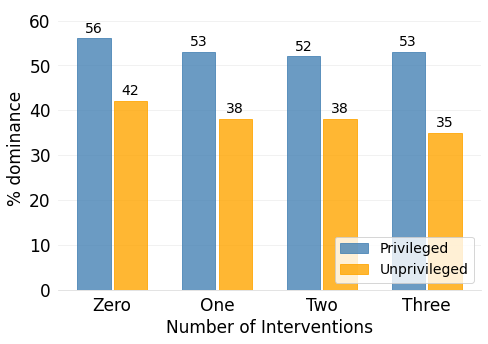

In [52]:
# percent of times privileged group performed worse than unprivileged group
x = np.arange(4)
x_lab = ["Zero", "One", "Two", "Three"]
fig, ax = plt.subplots(figsize=(7, 5))

width = 0.35
rects1 = ax.bar(x - width/2, priv_dom_mean, label='Privileged', color='steelblue', edgecolor='steelblue', alpha=0.8, width=0.32)
rects2 = ax.bar(x + width/2, unpriv_dom_mean, label='Unprivileged', color='orange', edgecolor='orange', alpha=0.8, width=0.32)

plt.rcParams.update({'font.size': 14})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_ylim([0, 63])
ax.set_xticks(x, x_lab)
#ax.set_ylabel('% of times group fairness metric <0.01')
ax.set_ylabel('% dominance')
ax.set_xlabel('Number of Interventions')
ax.legend(loc=4, ncol=1)
fig.tight_layout()
#plt.show()
fig.savefig('./figures/priv_unpriv_dom.png', dpi=600)

<h3>Base Rate</h3>

In [181]:
df = pd.concat([adult_df, german_df, bank_df, compas_df])
#df = pd.concat([adult_df, german_df, compas_df])
df = df[["Privileged base Rate", "Unprivileged base Rate"]]
#df = df.groupby(df.index).mean()

base_rate = {0:{"priv": [], "unpriv":[]}, 1:{"priv": [], "unpriv":[]}, 2:{"priv": [], "unpriv":[]}, 3:{"priv": [], "unpriv":[]}}
for index, row in df.iterrows():
    k = num_interventions(index)
    #print(index, k, round(row["Privileged base Rate"],3), round(row["Unprivileged base Rate"],3))
    base_rate[k]["priv"].append(row["Privileged base Rate"])
    base_rate[k]["unpriv"].append(row["Unprivileged base Rate"])

base_rate

{0: {'priv': [0.2652, 0.7908333333333334, 0.0782, 0.6952000000000002],
  'unpriv': [0.081266667,
   0.5553333333333333,
   0.1641999999999999,
   0.5556333333333333]},
 1: {'priv': [0.205833333,
   0.264633333,
   0.234233333,
   0.2652,
   0.373366667,
   0.397633333,
   0.2358,
   0.1813,
   0.189333333,
   0.9918,
   0.8326666666666668,
   0.6979000000000001,
   0.9283,
   0.6072666666666667,
   0.8117666666666666,
   0.7893666666666667,
   0.7658666666666667,
   0.7685333333333334,
   0.0809333333333333,
   0.1009,
   0.0038333333333333,
   0.0383666666666666,
   0.0610999999999999,
   0.0781333333333333,
   0.0838333333333333,
   0.079,
   0.6413000000000001,
   0.6859999999999999,
   0.6791666666666667,
   0.7021333333333333,
   0.5285666666666667,
   0.6405,
   0.2838333333333333,
   0.5912666666666666,
   0.6952000000000002],
  'unpriv': [0.089633333,
   0.077433333,
   0.144966667,
   0.0,
   0.3302,
   0.349866667,
   0.113066667,
   0.1662,
   0.166433333,
   0.8839333333333

In [182]:
priv_base = {}
unpriv_base = {}

for i in base_rate:
    priv_base[i] = round(np.mean(base_rate[i]["priv"])*100)
    unpriv_base[i] = round(np.mean(base_rate[i]["unpriv"])*100)

x = np.arange(4)
priv_base = [priv_base[i] for i in x]
unpriv_base = [unpriv_base[i] for i in x]
x_lab = ["Zero", "One", "Two", "Three"]

priv_base, unpriv_base

([46, 44, 45, 50], [34, 38, 40, 44])

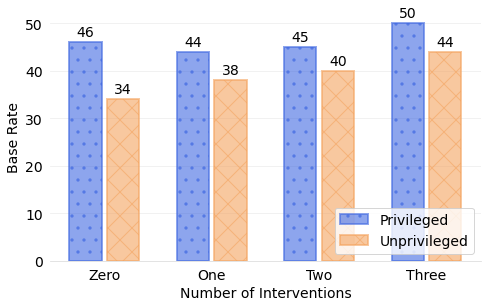

In [186]:
# code: https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 4.5))
plt.rcParams.update({'font.size': 14})

c1, c2 = 'royalblue', 'sandybrown'
rects1 = ax.bar(x - width/2, priv_base, label='Privileged', color=c1, edgecolor=c1, alpha=0.6, width=0.3, linewidth=2, hatch='.')
rects2 = ax.bar(x + width/2, unpriv_base, label='Unprivileged', color=c2, edgecolor=c2, alpha=0.6, width=0.3, linewidth=2, hatch='x')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Base Rate')
ax.set_xlabel('Number of Interventions')
#ax.set_title('Mean Accuracy and F1 Score by number of Interventions')
ax.set_xticks(x, x_lab)
#ax.set_ylim([0, 58])
ax.legend(loc=4)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.show()
fig.savefig('./figures/base_rate.png', dpi=600)

<h3>Privileged group gets Discriminated</h3>

In [49]:
adult_df = pd.read_csv("./data/adult.csv", index_col=0)
compas_df = pd.read_csv("./data/compas.csv", index_col=0)
bank_df = pd.read_csv("./data/bank.csv", index_col=0)
german_df = pd.read_csv("./data/german.csv", index_col=0)

In [91]:
def grouped_bar_chart(xlabels, y1, y2, title):
    # code: https://www.pythoncharts.com/matplotlib/grouped-bar-charts-matplotlib/
    width = 0.35  # the width of the bars
    x = np.arange(len(xlabels))
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.rcParams.update({'font.size': 15})
    #c1, c2 = 'royalblue', 'darksalmon'
    c1, c2 = 'royalblue', 'sandybrown'
    rects1 = ax.bar(x - width/2, y1, label='Privileged', color=c1, edgecolor=c1, alpha=0.6, width=0.3, linewidth=2, hatch='.')
    rects2 = ax.bar(x + width/2, y2, label='Unprivileged', color=c2, edgecolor=c2, alpha=0.6, width=0.3, linewidth=2, hatch='x')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('% change in False Negative Rate', size=17)
    #ax.set_xlabel('Number of Interventions')
    #ax.set_title('Change in False Positive Rate across different Interventions for COMPAS dataset', size=16)
    #ax.set_title(title, size=16)
    ax.set_xticks(x, xlabels, rotation = 90, size=15)
    ax.set_ylim([-29, 29])
    ax.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    #ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    #plt.show()
    #fig.savefig('./figures/base_rate.png', dpi=600)
    return fig

-8.813 10.64 1.827
-8.813 10.61 1.797
-8.813 8.7 -0.117
-8.813 10.64 1.827
-8.813 -4.23 -13.047
-8.813 17.66 8.847
-8.813 10.27 1.453
-8.813 3.48 -5.337
-8.813 17.04 8.23
-8.813 15.66 6.843
-8.813 8.36 -0.457
-8.813 9.17 0.353
-8.813 8.73 -0.08


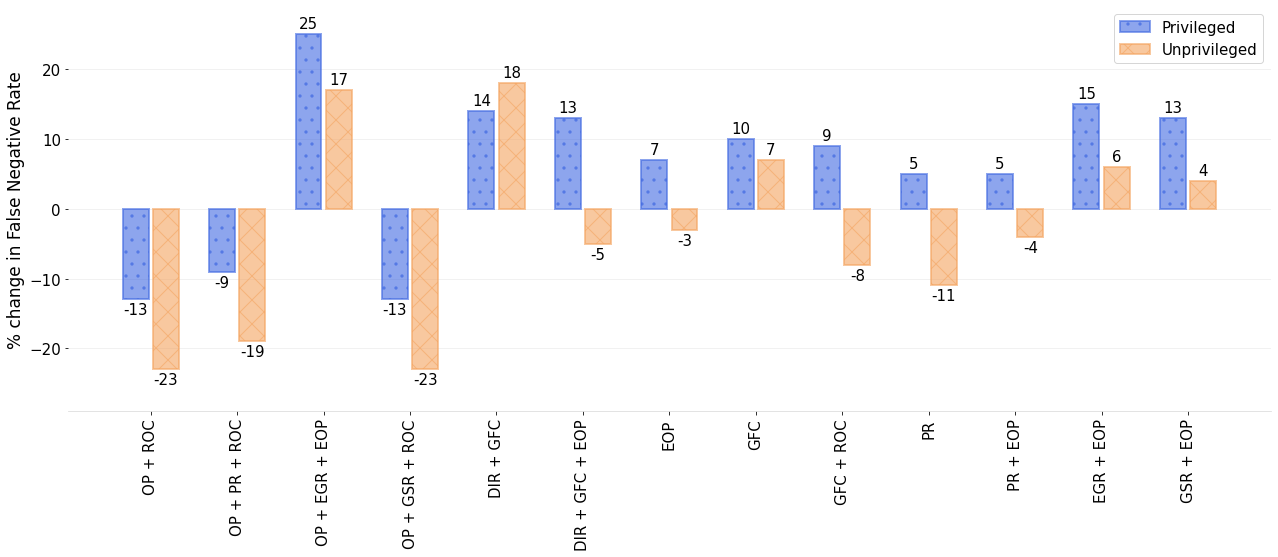

In [60]:
# Let's go with Compas dataset - False Positive Rate
# For compas dataset, positive means - No recidivate (label:0)
# so false positive means - Actually committed crime but labeled as innocent

#for data in [adult_df, compas_df, german_df, bank_df]:
for data in [adult_df]:
    #cols = ["False Positive Rate", "False Negative Rate", "False Discovery Rate", "False Omission Rate"]
    cols = ["False Negative Rate"]
    for metric in cols:
        b1 = data[metric + " - Privileged"]["Logistic Regression"]
        b2 = data[metric + " - Unprivileged"]["Logistic Regression"]
        #b1 = data['Privileged base Rate']["Logistic Regression"]
        #b2 = data['Unprivileged base Rate']["Logistic Regression"]
        m_ori = b1 - b2    # original metric value FPR Diff
        res = {"priv":[], "unpriv": []}
        row_names = []
        for index, row in data.iterrows():
            v1 = row[metric + " - Privileged"]
            v2 = row[metric + " - Unprivileged"]
            #v1 = row['Privileged base Rate']
            #v2 = row['Unprivileged base Rate']
            
            if index in ["OP + PR + CEOP", "OP + PR"]:
                continue
            
            m_new = v1 - v2    # new value for FPR Diff
            d1, d2 = v1-b1, v2-b2  # delta change in value
            #if abs(d1)>0.05 and abs(d2)>0.05 and d1*d2<0:
            if abs(m_new)-abs(m_ori)<0.05 and 0.03<abs(d1)<0.26 and 0.03<abs(d2)<0.32:
            #if abs(m_new)<abs(m_ori) and d1>0.01 and d2<0.01:
                print(round(m_ori*100,3), round((d1-d2)*100,2),round(m_new*100,3))
                res["priv"].append(round(d1,2)*100)
                res["unpriv"].append(round(d2,2)*100)
                row_names.append(index)

        fig = grouped_bar_chart(row_names, res["priv"], res["unpriv"], metric)
        #fig.savefig('./figures/fpr_compas.png', dpi=600)
        fig.savefig('./figures/fnr_adult.png', dpi=600)

In [138]:
#pd.crosstab(compas_df[])
from aif360.datasets import CompasDataset
c = CompasDataset().convert_to_dataframe()[0]
pd.crosstab(c["race"], c["two_year_recid"])

two_year_recid,0.0,1.0
race,,
0.0,2080,1987
1.0,1278,822


<h3>Error rate gets worse</h3>

In [132]:
adult_df = pd.read_csv("./data/adult.csv", index_col=0)
compas_df = pd.read_csv("./data/compas.csv", index_col=0)
bank_df = pd.read_csv("./data/bank.csv", index_col=0)
german_df = pd.read_csv("./data/german.csv", index_col=0)

In [193]:
def make_plot(y1, y2, metric):
    xlabels = ["One", "Two", "Three"]

    width = 0.35  # the width of the bars
    x = np.arange(len(xlabels))
    fig, ax = plt.subplots(figsize=(5, 3.75))
    plt.rcParams.update({'font.size': 13})
    c1, c2 = 'royalblue', 'sandybrown'
    rects1 = ax.bar(x - width/2, y1, label='Privileged', color=c1, edgecolor=c1, alpha=0.6, width=0.3, linewidth=2, hatch='.')
    rects2 = ax.bar(x + width/2, y2, label='Unprivileged', color=c2, edgecolor=c2, alpha=0.6, width=0.3, linewidth=2, hatch='x')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ylabel = ''
    if metric=="F1 Score":
        ylabel = '% times f1 scores decreases'
    elif metric=="False Positive Rate":
        ylabel = '% times FPR increases'
    elif metric=="False Negative Rate":
        ylabel = '% times FNR increases'
    ax.set_ylabel(ylabel, size=13)
    ax.set_xlabel('Number of Interventions')
    #ax.set_title('Change in False Positive Rate across different Interventions for COMPAS dataset', size=16)
    #ax.set_title(title, size=16)
    ax.set_xticks(x, xlabels, rotation = 0, size=13)
    #ax.set_ylim([30, 70])
    if metric=="F1 Score":
        #ax.set_ylim([0, 30])
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    #ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    fig.savefig('./figures/'+metric+'.png', dpi=600)

Metric:  False Positive Rate
{'priv': [13, 43, 41], 'unpriv': [20, 65, 60]}
[37, 44, 49] [57, 67, 71]
Metric:  False Negative Rate
{'priv': [20, 68, 58], 'unpriv': [16, 55, 44]}
[57, 70, 69] [46, 57, 52]
Metric:  F1 Score
{'priv': [9, 16, 11], 'unpriv': [7, 14, 7]}
[26, 16, 13] [20, 14, 8]


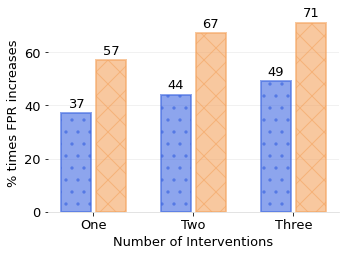

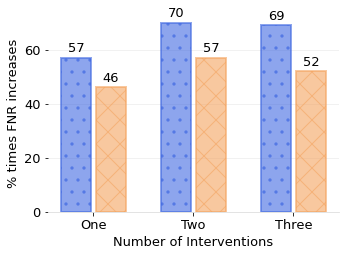

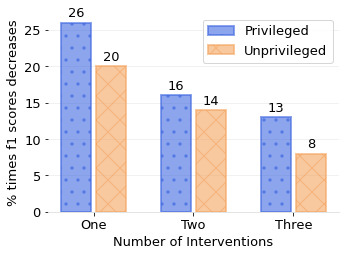

In [194]:
#cols = ["False Positive Rate", "False Negative Rate", "False Discovery Rate", "False Omission Rate"]
cols = ["False Positive Rate", "False Negative Rate", "F1 Score"]
    
for metric in cols:  
    print("Metric: ", metric)
    res = {"priv":[0, 0, 0], "unpriv": [0, 0, 0]}
    tot_cases = [0, 0, 0]

    for data in [adult_df, compas_df, german_df, bank_df]:
    #for data in [adult_df]:

        base_p = data[metric + " - Privileged"]["Logistic Regression"]
        base_u = data[metric + " - Unprivileged"]["Logistic Regression"]
    
        for index, row in data.iterrows():
            if index == "Logistic Regression":
                continue
                
            new_p = row[metric + " - Privileged"]
            new_u = row[metric + " - Unprivileged"]
            
            n = num_interventions(index)
            tot_cases[n-1] += 1
            
            if metric!="Accuracy":
                if abs(new_p)>abs(base_p):
                    res["priv"][n-1] += 1

                if abs(new_u)>abs(base_u):
                    res["unpriv"][n-1] += 1
            else:
                if abs(new_p)<abs(base_p):
                    res["priv"][n-1] += 1

                if abs(new_u)<abs(base_u):
                    res["unpriv"][n-1] += 1
        
    print(res)
    priv_per = [round(res["priv"][i]/tot_cases[i]*100) for i in [0,1,2]]
    unpriv_per = [round(res["unpriv"][i]/tot_cases[i]*100) for i in [0,1,2]]
    print(priv_per, unpriv_per)
    make_plot(priv_per, unpriv_per, metric)

In [143]:
from aif360.metrics import BinaryLabelDatasetMetric
BLDM = BinaryLabelDatasetMetric(CompasDataset(),
                                    unprivileged_groups=[{'race': 0}],
                                    privileged_groups=[{'race': 1}])
BLDM.num_positives()   

3358.0

In [134]:
compas_df[["False Positive Rate - Unprivileged", "False Positive Rate - Privileged"]]

,False Positive Rate - Unprivileged,False Positive Rate - Privileged
OP,0.344333,0.481033
OP + EOP,0.449933,0.471667
OP + CEOP,0.344333,0.557633
OP + ROC,0.356433,0.377400
OP + GFC,0.200000,0.228367
OP + GFC + EOP,0.556433,0.535867
OP + GFC + CEOP,0.800000,0.771633
OP + GFC + ROC,0.676967,0.676600
OP + PR,0.673433,0.490133
OP + PR + EOP,0.485133,0.481633


<h3>EXTRA</h3>

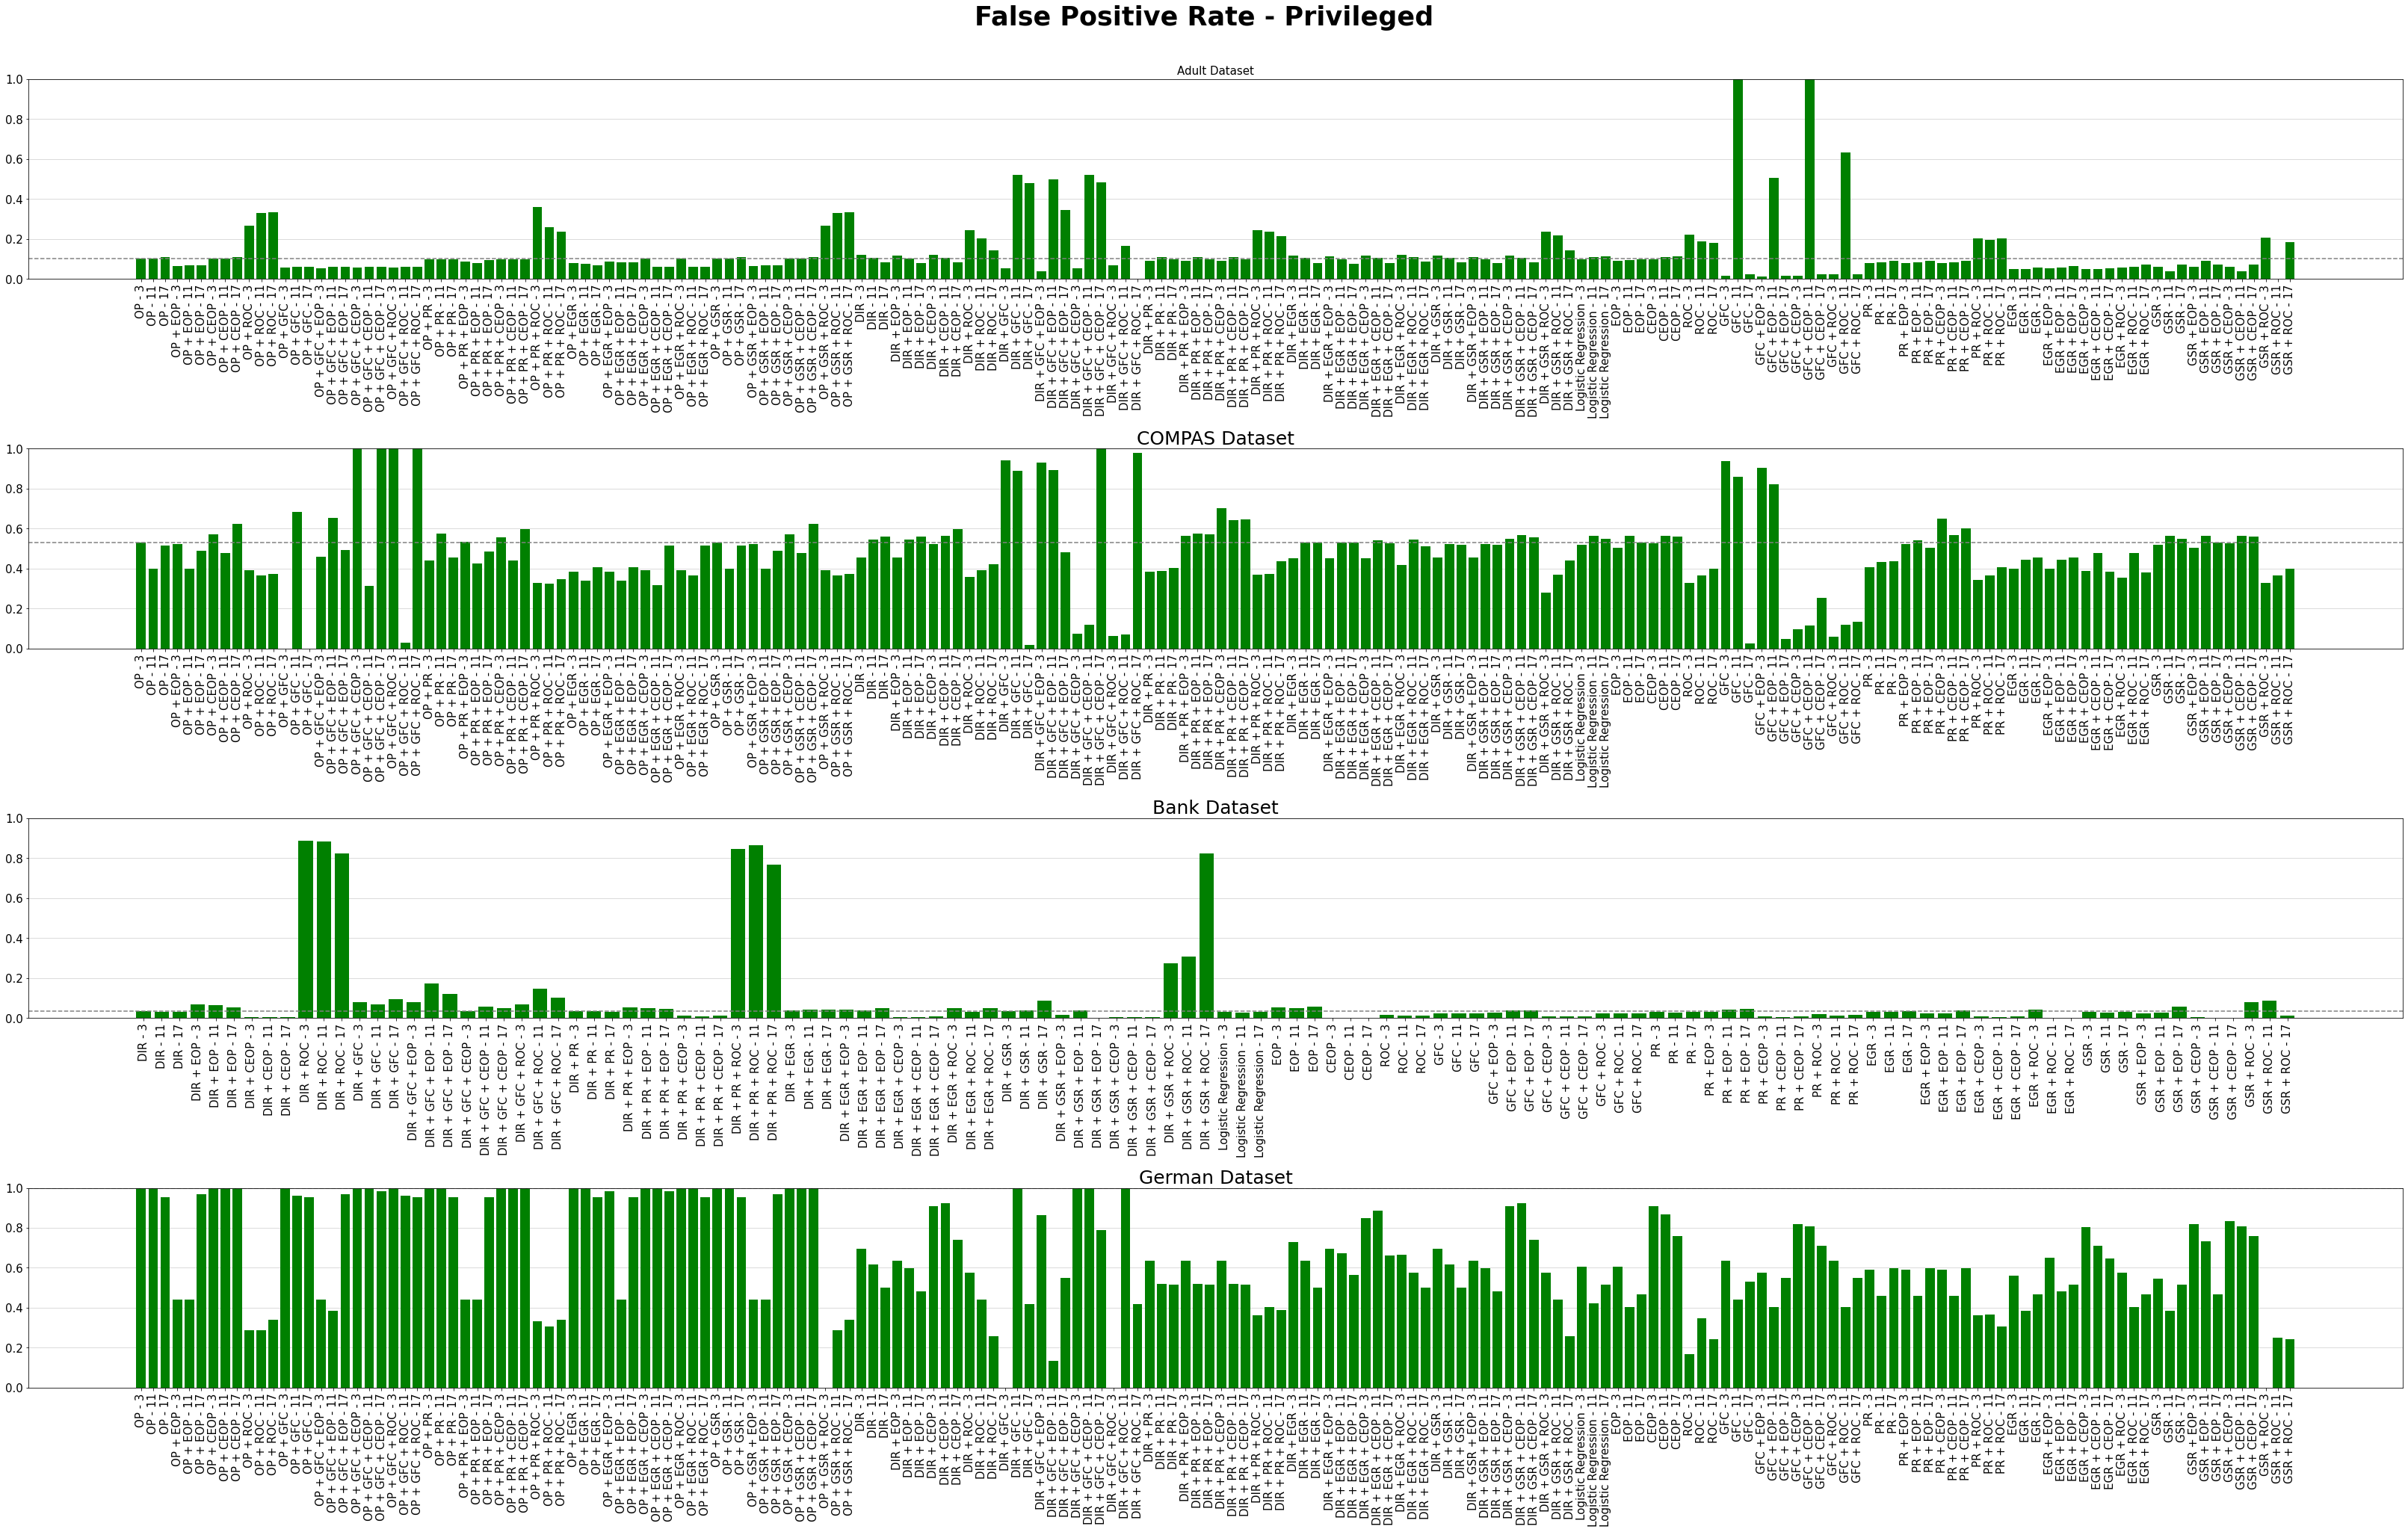

In [71]:
def create_graph(fairness_metric):
    def get_limits(max_val):
        if max_val < 0.25:
            return [0.0,0.25]
        if max_val < 0.5:
            return [0.0,0.5]
        if max_val < 0.75:
            return [0.0,0.75]
        return [0.0,1.0]
    
    fig, ax = plt.subplots(4, figsize=(45, 30))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=15)
    plt.rcParams.update({'font.size': 5})
    
    vals = list(adult_df[fairness_metric])
    Labels=list(adult_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    #ax[0].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[0].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[0].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[0].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[0].set_ylim(get_limits(max(vals)))
    
    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(compas_df[fairness_metric])
    Labels=list(compas_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    #ax[1].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[1].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[1].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[1].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[1].set_ylim(get_limits(max(vals)))
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(bank_df[fairness_metric])
    Labels=list(bank_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    #ax[2].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[2].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[2].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[2].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[2].set_ylim(get_limits(max(vals)))
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(german_df[fairness_metric])
    Labels=list(german_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    #ax[3].bar(y_pos - 0.2, unpriv,width=0.4, color = 'blue' , label='Unprivileged')
    ax[3].bar(y_pos, vals, color = 'green',label = 'Privileged')
    #ax[3].legend(('Unprivileged','Privileged'), loc='upper right')
    ax[3].axhline(y = vals[0], color = 'grey', linestyle = 'dashed')
    ax[3].set_ylim(get_limits(max(vals)))
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.yaxis.grid(color="lightgrey")
        ax.set_axisbelow(True)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("R3/" + fairness_metric + ".png", bbox_inches='tight', )

create_graph("False Positive Rate - Privileged")
#create_graph("False Negative Rate - Privileged")
#create_graph("Accuracy - Privileged")
#create_graph("False Discovery Rate - Privileged")
#create_graph("False Omission Rate - Privileged")
#create_graph("Privileged base Rate")
#create_graph("F1 Score - Privileged")

C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/634128679.py:32: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(intervention, y_vals[i], color='g', hatch=pattern[i], zorder=3)
C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/634128679.py:32: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(intervention, y_vals[i], color='g', hatch=pattern[i], zorder=3)
C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/634128679.py:32: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar(interven

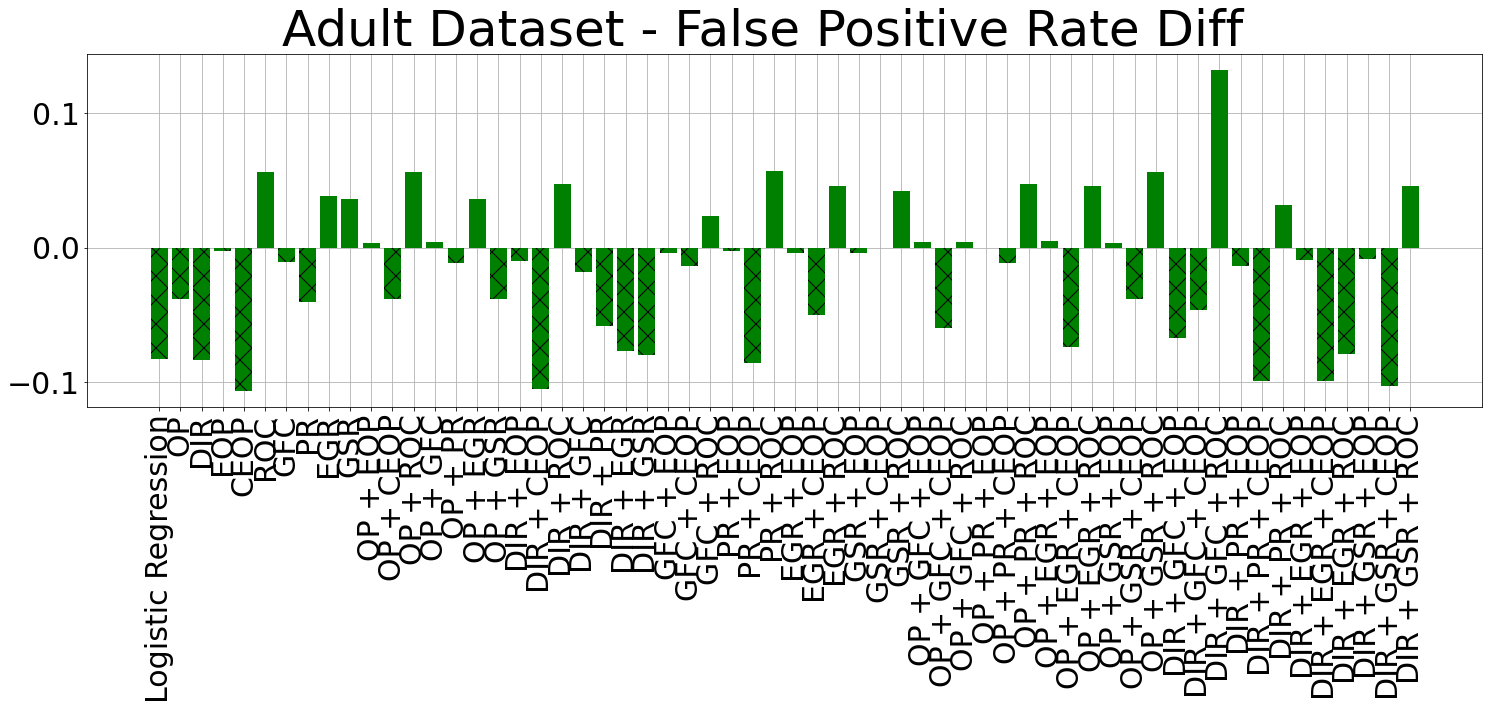

'create_value_graph("False Negative Rate Diff")\ncreate_value_graph("Accuracy Diff")\ncreate_value_graph("False Discovery Rate Diff")\ncreate_value_graph("False Omission Rate Diff")\ncreate_value_graph("Statistical Parity Diff")\ncreate_value_graph("F1 Score Diff")'

In [26]:
def create_value_graph(fairness_metric):
    pattern = []
    for val in adult_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in compas_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in bank_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in german_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    fig = plt.figure(figsize=(25,6.5))
    fig.patch.set_facecolor('white')
    fig.patch.set_alpha(1.0)
    fig.suptitle("Adult Dataset - " + fairness_metric, fontsize=50)
    plt.rcParams.update({'font.size': 30})
    #plt.title("Adult Dataset - " + fairness_metric)
    y_vals = adult_df[fairness_metric]#abs(adult_df[fairness_metric])
    #plt.bar(adult_df["Adult"], y_vals, hatch=pattern)
    for intervention, i in zip(adult_df.index, range(len(adult_df.index))):
        plt.bar(intervention, y_vals[i], color='g', hatch=pattern[i], zorder=3)
    plt.xticks(rotation=90)
    plt.grid(zorder=0)
    plt.savefig("R3/Adult Dataset - " + fairness_metric + ".png", bbox_inches='tight', )
    plt.show()

create_value_graph("False Positive Rate Diff")
'''create_value_graph("False Negative Rate Diff")
create_value_graph("Accuracy Diff")
create_value_graph("False Discovery Rate Diff")
create_value_graph("False Omission Rate Diff")
create_value_graph("Statistical Parity Diff")
create_value_graph("F1 Score Diff")'''

C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/210606474.py:39: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  ax[0].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/210606474.py:57: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  ax[1].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
C:\Users\Bhavya\AppData\Local\Temp/ipykernel_8768/210606474.py:75: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  ax[2].bar(y_pos[i], 

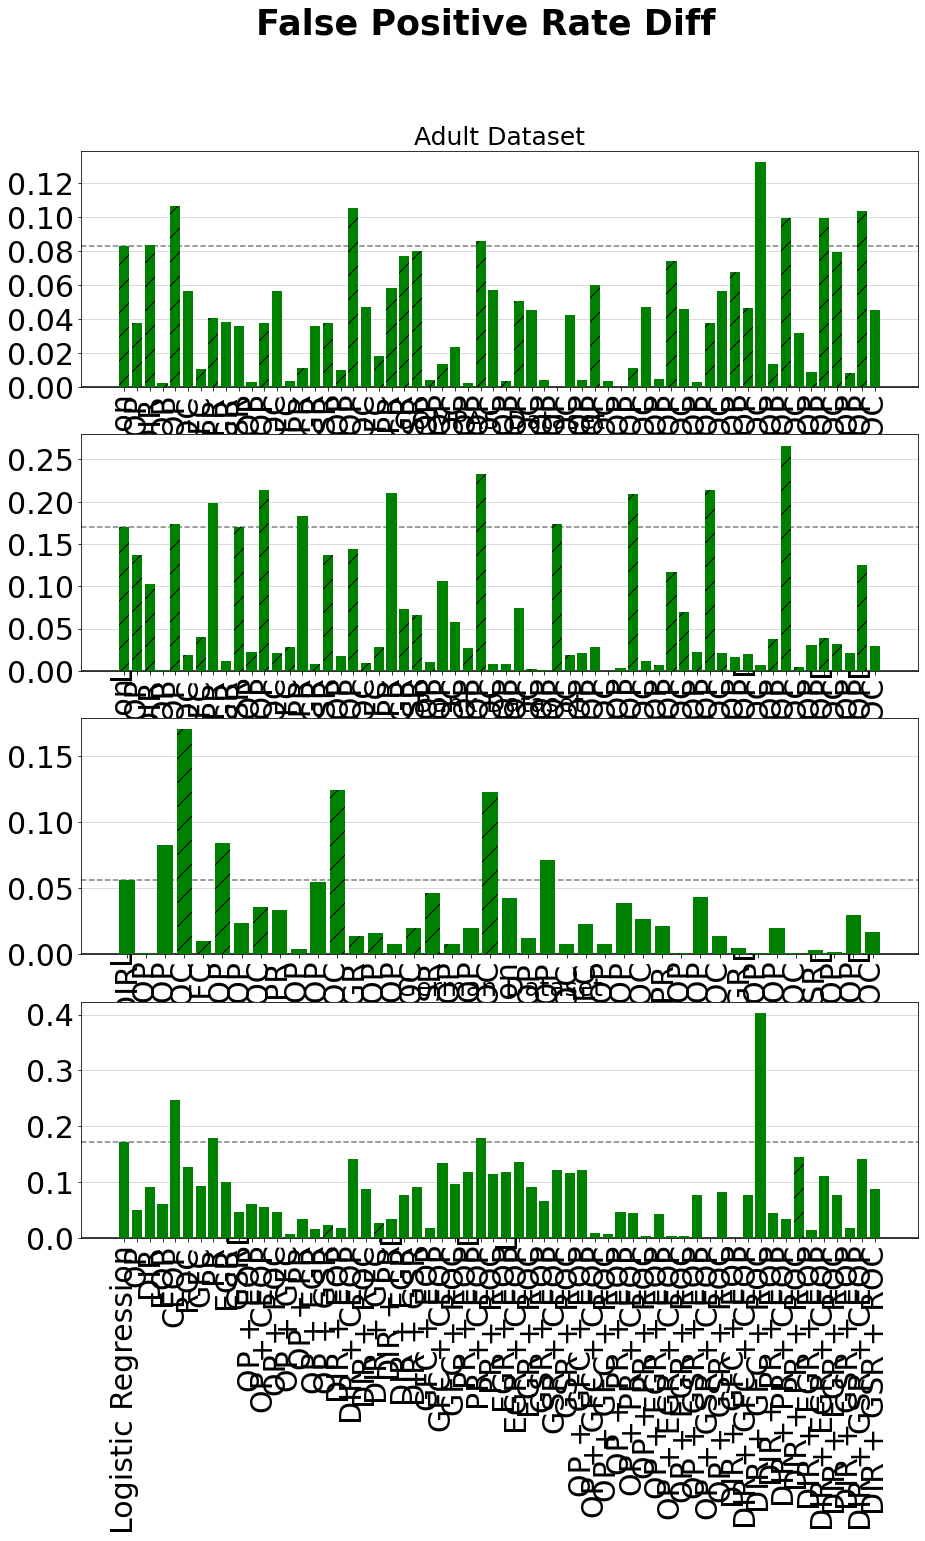

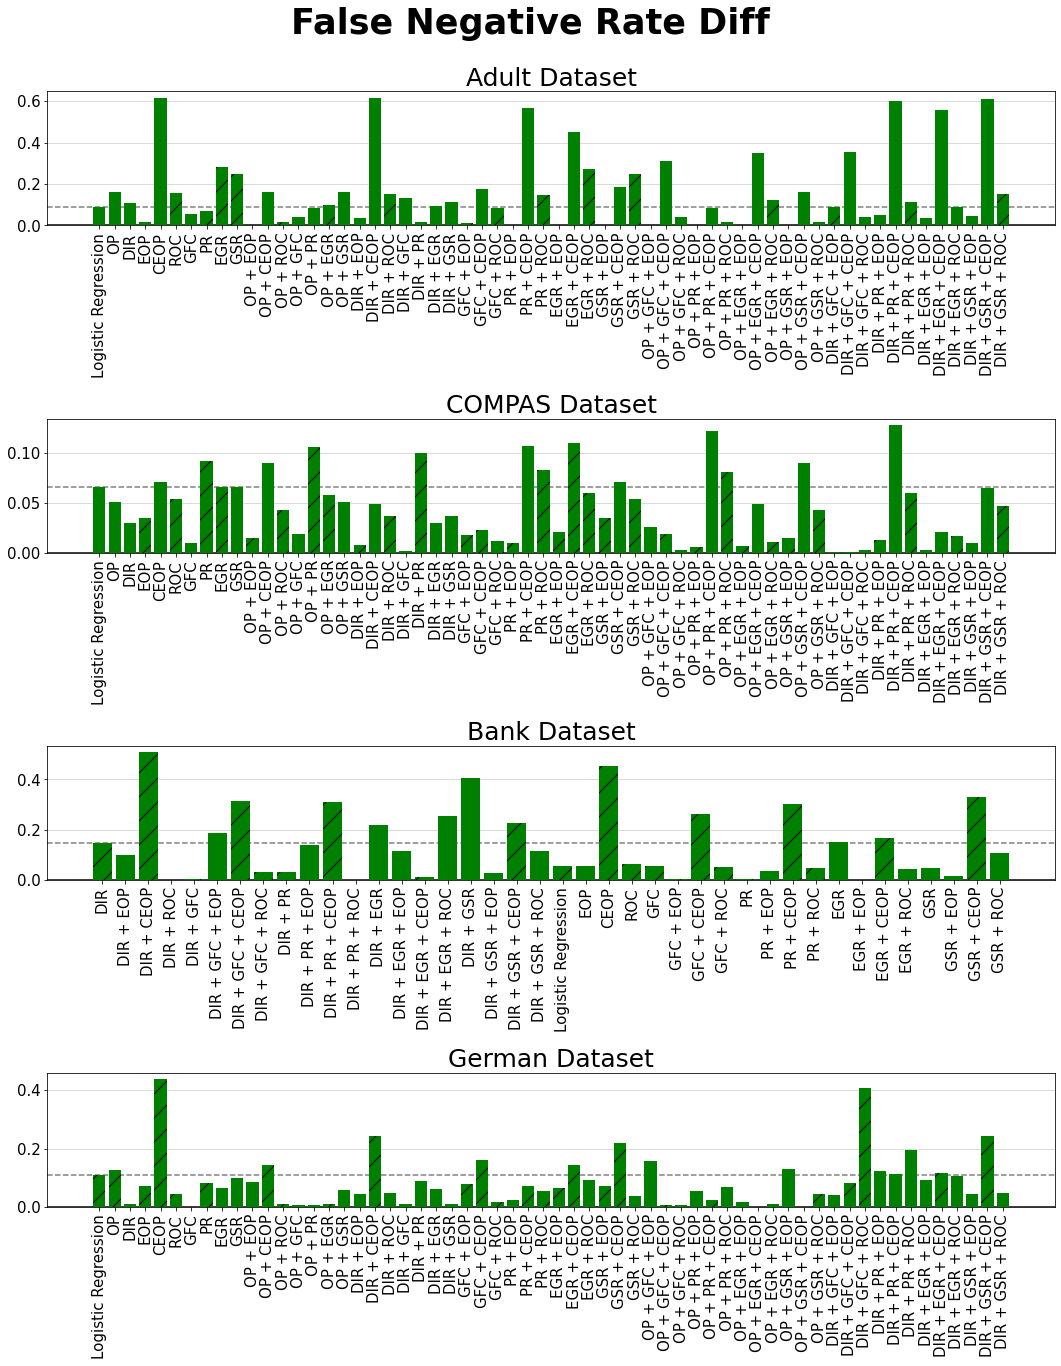

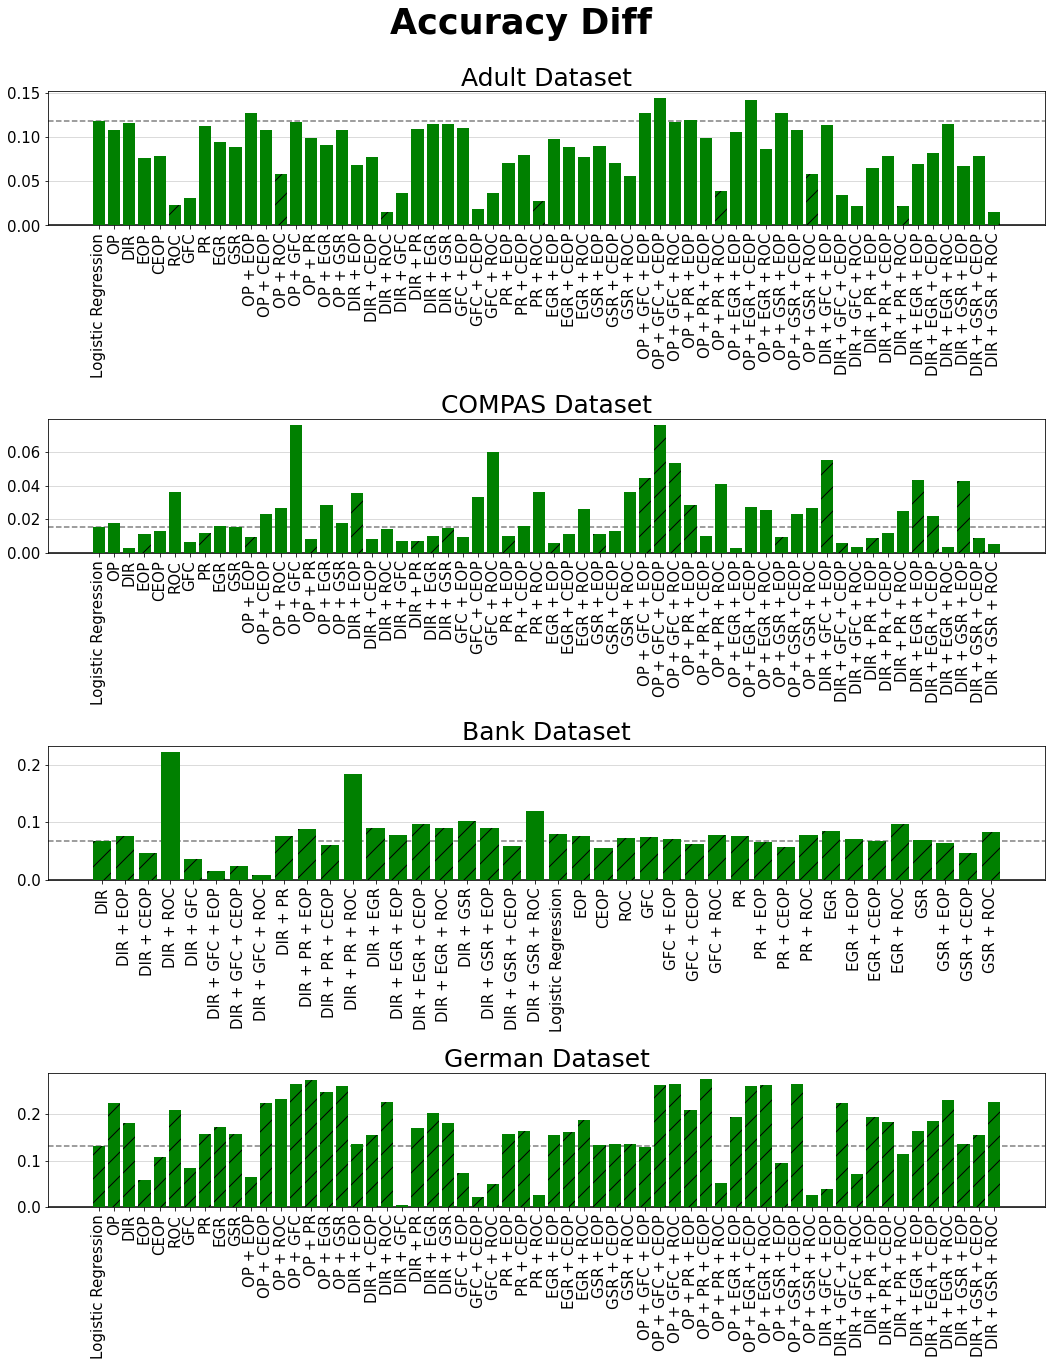

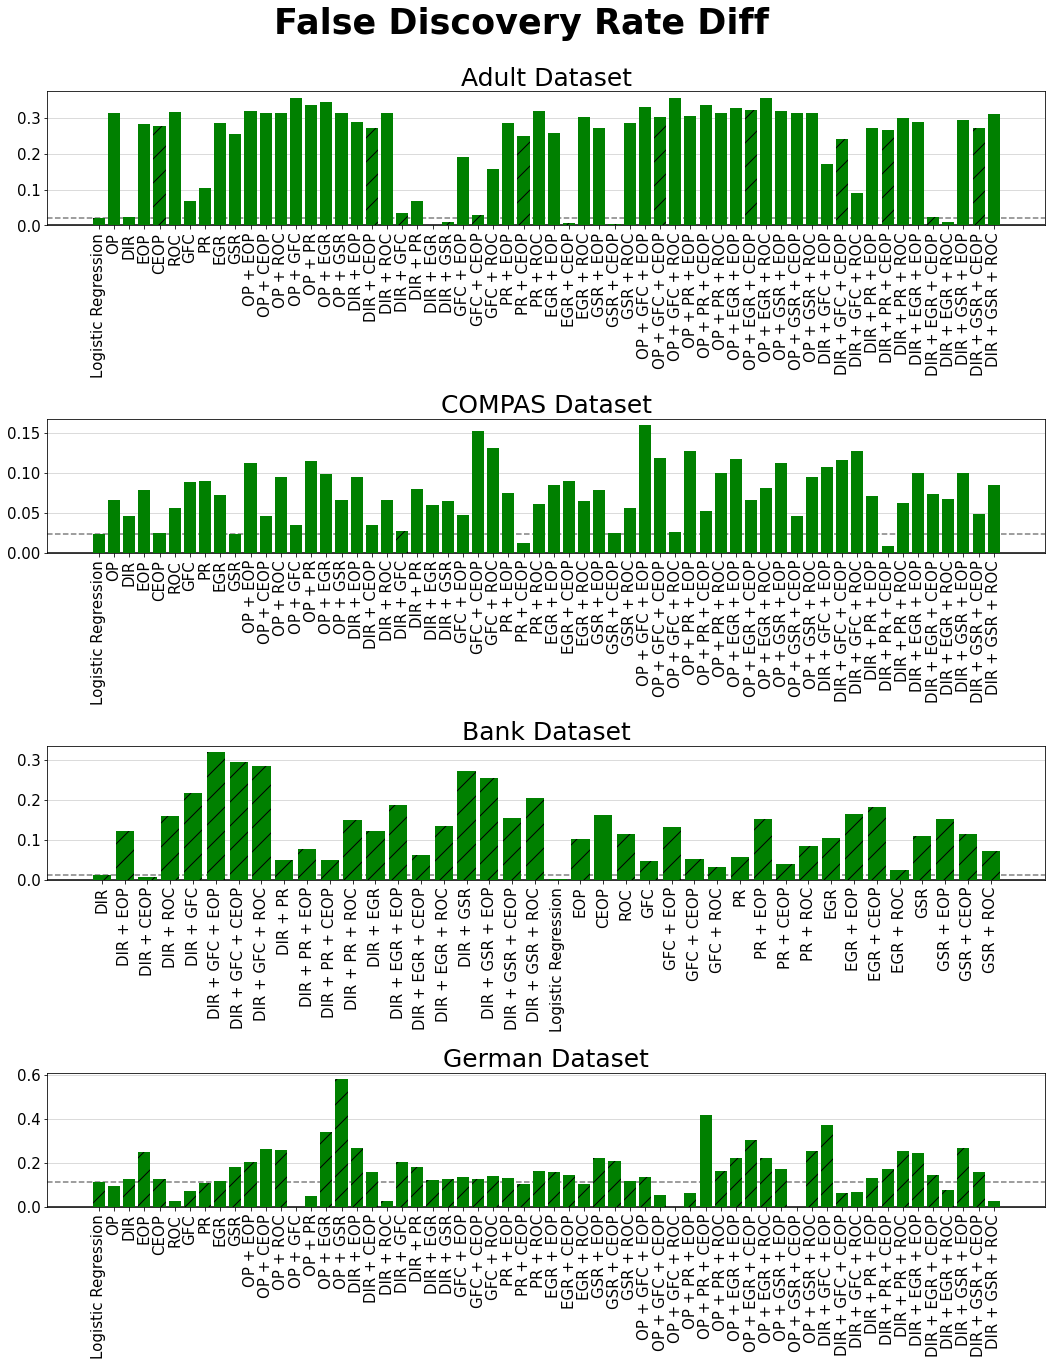

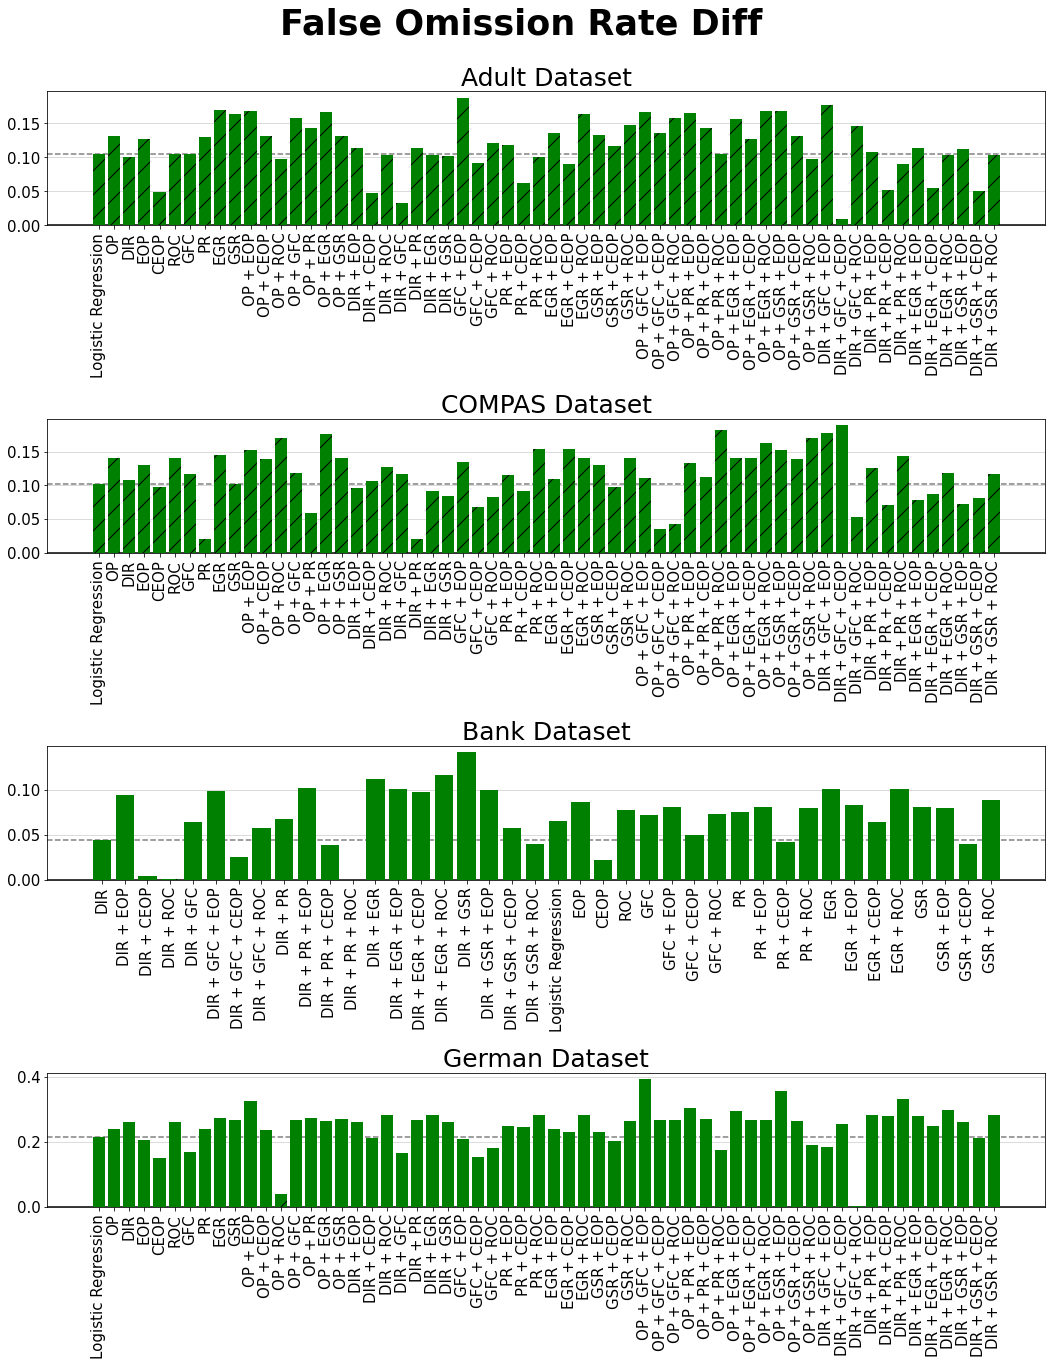

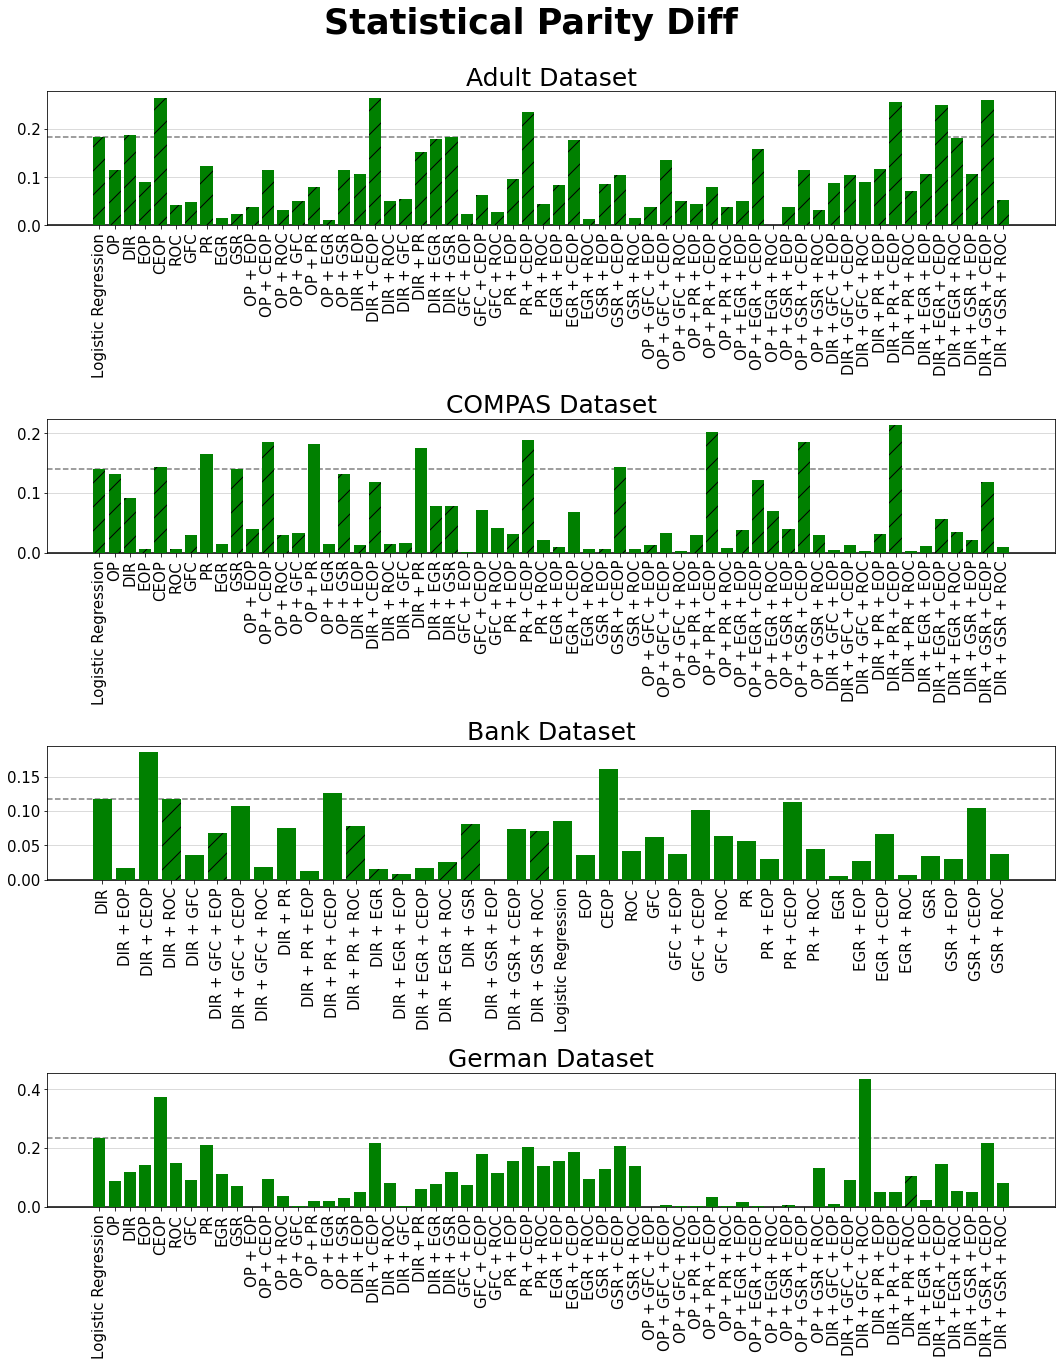

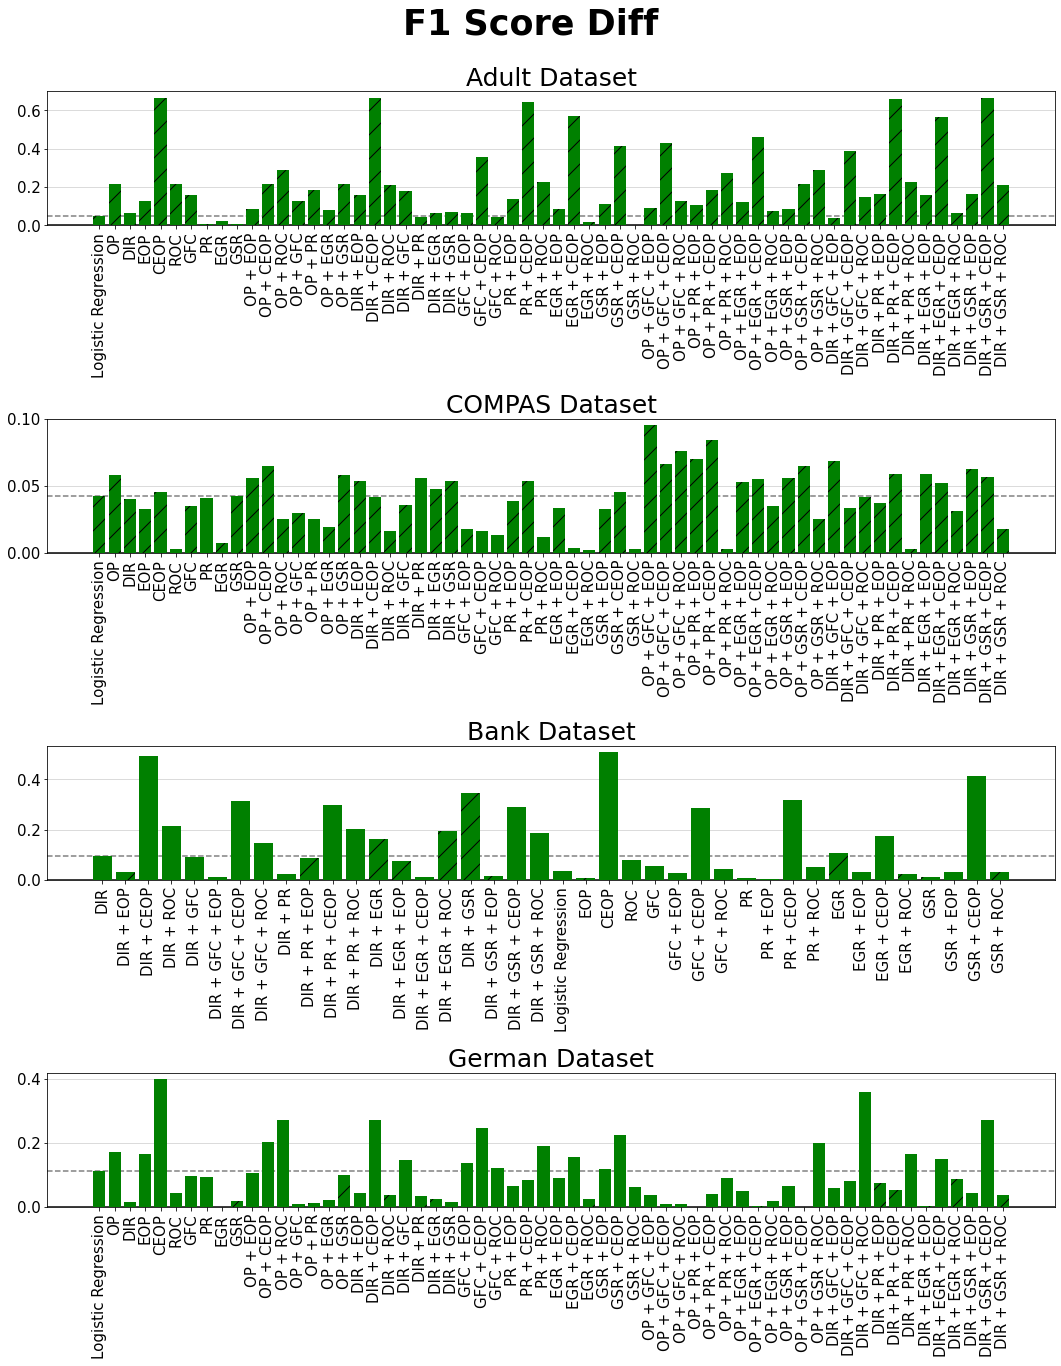

In [27]:
def create_diff_graph(fairness_metric):
    pattern = []
    for val in adult_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in compas_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in bank_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    for val in german_df[fairness_metric]:
        if val > 0:
            pattern.append(' ')
        elif val < 0:
            pattern.append('x')
    
    
    fig, ax = plt.subplots(4, figsize=(15, 20))
    
    ax[0].patch.set_facecolor('white')
    ax[0].patch.set_alpha(1.0)
    ax[0].set_title("Adult Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(adult_df[fairness_metric])
    Labels=list(adult_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[0])
    plt.xticks(y_pos, Labels)
    for i in range(len(adult_df.index)):
        pattern = "/" if vals[i] < 0 else " "
        ax[0].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[0].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[0].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[0].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[1].patch.set_facecolor('white')
    ax[1].patch.set_alpha(1.0)
    ax[1].set_title("COMPAS Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(compas_df[fairness_metric])
    Labels=list(compas_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[1])
    plt.xticks(y_pos, Labels)
    for i in range(len(compas_df.index)):
        pattern = "/" if vals[i] < 0 else " "
        ax[1].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[1].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[1].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[1].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[2].patch.set_facecolor('white')
    ax[2].patch.set_alpha(1.0)
    ax[2].set_title("Bank Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(bank_df[fairness_metric])
    Labels=list(bank_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[2])
    plt.xticks(y_pos, Labels)
    for i in range(len(bank_df.index)):
        pattern = "/" if vals[i] < 0 else " "
        ax[2].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[2].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[2].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[2].axhline(y = 0, color = 'black', linestyle = 'solid')
    
    
    ax[3].patch.set_facecolor('white')
    ax[3].patch.set_alpha(1.0)
    ax[3].set_title("German Dataset", size=25)
    plt.rcParams.update({'font.size': 15})
    
    vals = list(german_df[fairness_metric])
    Labels=list(german_df.index)
    y_pos=np.arange(len(Labels))
    plt.sca(ax[3])
    plt.xticks(y_pos, Labels)
    for i in range(len(german_df.index)):
        pattern = "/" if vals[i] < 0 else " "
        ax[3].bar(y_pos[i], abs(vals[i]), color='g', hatch=pattern, zorder=3)
    #ax[3].bar(y_pos, vals, color = 'green',label = 'Privileged')
    ax[3].axhline(y = abs(vals[0]), color = 'grey', linestyle = 'dashed')
    ax[3].axhline(y = 0, color = 'black', linestyle = 'solid')
        
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
        ax.yaxis.grid(color="lightgrey")
        ax.set_axisbelow(True)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    ax.xaxis.label.set_size(20)
    fig.suptitle(fairness_metric,fontweight="bold",fontsize=35)
    fig.patch.set_alpha(1.0)
    
    plt.savefig("R3/" + fairness_metric + ".png", bbox_inches='tight', )
    
create_diff_graph("False Positive Rate Diff")
create_diff_graph("False Negative Rate Diff")
create_diff_graph("Accuracy Diff")
create_diff_graph("False Discovery Rate Diff")
create_diff_graph("False Omission Rate Diff")
create_diff_graph("Statistical Parity Diff")
create_diff_graph("F1 Score Diff")

In [93]:
int_df = pandas.DataFrame(columns=['% Worse Than Base', 'Priv worse than Unpriv'])

total_base_comparison = np.zeros((0,10))
total_priv = np.zeros((0,7))
diffs = [metric for metric in adult_df.columns if "Diff" in metric]

#def get_table_metric_for_df(df):
for df in [adult_df, compas_df, bank_df, german_df]:
    base = df.iloc[0]
    base_abs = abs(df.loc[df.index[0],diffs])
    for i in df.index:
        privs = df.loc[i, diffs] > 0
        total_priv = np.vstack((total_priv, np.array(privs)))
        
        temp = list(abs(df.loc[i, diffs]) > base_abs)
        temp.extend([df.loc[i, 'Accuracy'] < base['Accuracy'], df.loc[i, 'F1 Score'] < base['F1 Score'], df.loc[i, 'Consistency'] < base['Consistency']])
        total_base_comparison = np.vstack((total_base_comparison, np.array(temp)))

#print(total_base_comparison)
for i in range(len(total_base_comparison)):
    int_df.loc[len(int_df.index)] = [(sum(total_base_comparison[i])/len(total_base_comparison[i]))*100, (sum(total_priv[i])/len(total_priv[i]))*100]
#int_df.index = adult_df['Adult']
new_col_base = []
new_col_priv = []
for i in range(int(len(total_base_comparison)/4)):
    new_col_base.append((int_df.iloc[i, 0] + int_df.iloc[i+48, 0] + int_df.iloc[i+96, 0] + int_df.iloc[i+144, 0])/4)
    new_col_priv.append((int_df.iloc[i, 1] + int_df.iloc[i+48, 1] + int_df.iloc[i+96, 1] + int_df.iloc[i+144, 1])/4)

final_int_df = pandas.DataFrame(columns=['% Worse Than Base', 'Priv worse than Unpriv'])
final_int_df['% Worse Than Base'] = new_col_base
final_int_df['Priv worse than Unpriv'] = new_col_priv

final_int_df.index = list(adult_df["Adult"])
final_int_df

,% Worse Than Base,Priv worse than Unpriv
Logistic Regression,0.0,39.285714
RW,0.0,35.714286
DIR,37.5,39.285714
EGR,37.5,46.428571
GSR,52.5,42.857143
PR,57.5,42.857143
CEOP,50.0,39.285714
ROC,50.0,50.000000
EOP,42.5,46.428571
RW + EGR,37.5,39.285714
